In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([10,20,30,40,50])

In [3]:
type(s)

pandas.core.series.Series

In [4]:
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [5]:
s[0]

10

In [7]:
sales = pd.Series([10,20,40,30,50], index = ['mon','tue','wed','mon','fri'])   # Custom index

In [8]:
sales

mon    10
tue    20
wed    40
mon    30
fri    50
dtype: int64

In [9]:
sales['mon']

mon    10
mon    30
dtype: int64

In [10]:
sales[0]  # Position 

10

In [11]:
marks = pd.Series([60,80,56,89,66], index =[101,102,103,104,105])

In [12]:
marks

101    60
102    80
103    56
104    89
105    66
dtype: int64

In [13]:
marks[101]

60

In [16]:
#marks[0]  # will throw error

In [18]:
nums = pd.Series( np.random.randint(1,100,10), index = np.arange(11,21))

In [14]:
nums

11     9
12    98
13    41
14    99
15    28
16    49
17    75
18    85
19     5
20    25
dtype: int32

### Properties of Series

In [20]:
nums.is_unique

True

In [21]:
nums.axes   # Row labels

[Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')]

In [22]:
print(nums.index),
print(type(nums.index))

Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>


In [23]:
print(nums.values, type(nums.values))

[ 7 45 13 54 91 62 38 46 72 89] <class 'numpy.ndarray'>


### loc and iloc properties

In [24]:
nums[11], nums.loc[11]   # Index (row label)

(7, 7)

In [25]:
nums.iloc[0]    # Position 

7

In [26]:
# for loc end range is inclusive  
nums.loc[11:15]

11     7
12    45
13    13
14    54
15    91
dtype: int32

In [27]:
nums.iloc[0:5]   # for iloc it is exclusive 

11     7
12    45
13    13
14    54
15    91
dtype: int32

#### Fancy indexing

In [28]:
nums > 50

11    False
12    False
13    False
14     True
15     True
16     True
17    False
18    False
19     True
20     True
dtype: bool

In [29]:
nums[ nums > 50 ]  # Boolean indexing

14    54
15    91
16    62
19    72
20    89
dtype: int32

In [30]:
nums.loc[[11,15,20]]  # Array of Row labels

11     7
15    91
20    89
dtype: int32

In [31]:
nums.iloc[[0,4,6]]    # Array of Row positions

11     7
15    91
17    38
dtype: int32

### Methods of Series 

In [32]:
nums.describe()

count    10.000000
mean     51.700000
std      28.323724
min       7.000000
25%      39.750000
50%      50.000000
75%      69.500000
max      91.000000
dtype: float64

In [33]:
summary = nums.describe()
print(type(summary))

<class 'pandas.core.series.Series'>


In [34]:
summary['mean'], summary['50%']

(51.7, 50.0)

In [26]:
nums.mean()

60.9

In [16]:
nums.index.is_unique

True

<AxesSubplot:>

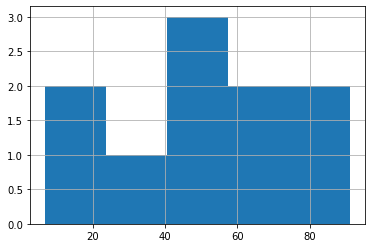

In [36]:
nums.hist(bins = 5)

<AxesSubplot:>

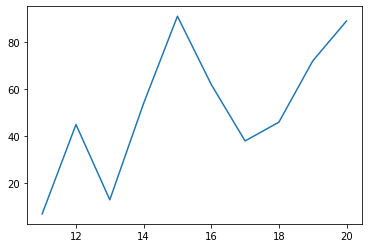

In [38]:
nums.plot()

#### Iteration

In [39]:
for i,n in nums.items():
     print(f"{i} - {n}")

11 - 7
12 - 45
13 - 13
14 - 54
15 - 91
16 - 62
17 - 38
18 - 46
19 - 72
20 - 89


In [40]:
for n in nums:
    print(n)

7
45
13
54
91
62
38
46
72
89


#### Ranking

In [56]:
marks = pd.Series([60,70,80,60,85,75], name = "Python")

In [57]:
marks

0    60
1    70
2    80
3    60
4    85
5    75
Name: Python, dtype: int64

In [54]:
marks.rank()

0    1.5
1    3.0
2    5.0
3    1.5
4    6.0
5    4.0
Name: Marks, dtype: float64

In [31]:
marks.rank(ascending=False)

0    5.5
1    4.0
2    2.0
3    5.5
4    1.0
5    3.0
dtype: float64

In [43]:
marks.rank(method='min')

0    1.0
1    3.0
2    5.0
3    1.0
4    6.0
5    4.0
dtype: float64

In [45]:
marks.rank(method='dense')

0    1.0
1    2.0
2    4.0
3    1.0
4    5.0
5    3.0
dtype: float64

In [41]:
marks.rank(method='dense', ascending=False)

0    5.0
1    4.0
2    2.0
3    5.0
4    1.0
5    3.0
dtype: float64

In [46]:
marks.rank(method='first')

0    1.0
1    3.0
2    5.0
3    2.0
4    6.0
5    4.0
dtype: float64

#### Selecting rows

In [48]:
marks.head()   # First 5

0    60
1    70
2    80
3    60
4    85
dtype: int64

In [49]:
marks.tail(3)

3    60
4    85
5    75
dtype: int64

In [52]:
marks.sample(3)

3    60
0    60
1    70
dtype: int64

In [58]:
sales = pd.Series( [100,120,150,100,80,200], index = [1,2,3,4,5,6])

In [59]:
# Display months where value is less than previous month 


In [25]:
pd.Series([10,20,30,15,30]).pct_change() * 100

0      NaN
1    100.0
2     50.0
3    -50.0
4    100.0
dtype: float64

In [26]:
marks.sort_values(ascending=False)

4    85
2    80
5    75
1    70
3    60
0    60
dtype: int64

In [37]:
marks.quantile(.25)

62.5

In [29]:
marks.quantile([.25,.50,.75])

0.25    62.50
0.50    72.50
0.75    78.75
dtype: float64

In [30]:
# Parameter is a series 
def count_even(s):
    count = 0
    for n in s:
        if n % 2 == 0:
            count +=1
    return count 

In [31]:
marks.agg(['min','max','sum','mean','count', count_even])

min            60.000000
max            85.000000
sum           430.000000
mean           71.666667
count           6.000000
count_even      4.000000
dtype: float64

In [5]:
marks

0    60
1    70
2    80
3    60
4    85
5    75
dtype: int64

#### apply()

In [3]:
# Parameter is a single value from series 
def get_grade(v):
    if v > 80:
        return "A"
    elif v > 60:
        return "B"
    else:
        return "C"

In [4]:
print(marks)
marks.apply(get_grade)

0    60
1    70
2    80
3    60
4    85
5    75
dtype: int64


0    C
1    B
2    B
3    C
4    A
5    B
dtype: object

In [6]:
for v in map(get_grade,marks):
    print(v)

C
B
B
C
A
B


In [6]:
marks.apply(lambda v : 'Passed' if v >=70 else 'Failed')

0    Failed
1    Passed
2    Passed
3    Failed
4    Passed
5    Passed
dtype: object

In [62]:
marks.count()

6

In [63]:
marks.sort_values(ascending=False)

4    85
2    80
5    75
1    70
3    60
0    60
dtype: int64

In [11]:
marks.sort_values(ascending=False).iloc[:3]  # Top 2 marks

4    85
2    80
5    75
dtype: int64

In [10]:
marks.sort_values(ascending=False).loc[:3]  # Top 2 marks

4    85
2    80
5    75
1    70
3    60
dtype: int64

In [19]:
smarks = marks.sort_values(ascending=False)

In [27]:
smarks

4    85
2    80
5    75
1    70
3    60
0    60
dtype: int64

In [20]:
smarks.head(3)

4    85
2    80
5    75
dtype: int64

In [21]:
smarks.tail(3)

1    70
3    60
0    60
dtype: int64

#### Saving series

In [12]:
sales = pd.Series((100,120,150,100,200), index  = np.arange(1,6))
sales.name  ="Sales"
sales.index.name = "Month"

In [13]:
sales

Month
1    100
2    120
3    150
4    100
5    200
Name: Sales, dtype: int64

In [14]:
sales.to_csv("sales.csv")

In [39]:
sales.to_json()

'{"1":100,"2":120,"3":150,"4":100,"5":200}'

In [36]:
sales.value_counts()

100    2
150    1
200    1
120    1
Name: Units, dtype: int64

#### load from csv file 

In [40]:
# load data from csv
sales = pd.read_csv("sales.csv")

In [41]:
type(sales)

pandas.core.frame.DataFrame

In [42]:
sales

,Month,Units
0,1,100
1,2,120
2,3,150
3,4,100
4,5,200


### Handle null (na) values

In [16]:
sales = pd.Series((100,120,150,100,200,np.nan,175,np.nan,200,100), 
                   index  = np.arange(1,11))
sales.name  ="Units"
sales.index.name = "Month"

In [17]:
sales

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [18]:
sales.isnull()    # sales.isna()

Month
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
Name: Units, dtype: bool

In [19]:
sales.notna().sum()   #  Count no. of not null values 

8

In [20]:
sales.notna().value_counts()

True     8
False    2
Name: Units, dtype: int64

In [23]:
sales [sales.notna()] # Display all not null values 

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [24]:
sales.fillna(0)

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       0.0
7     175.0
8       0.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [47]:
sales.dropna()  # inplace=True will modify series inplace 

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [22]:
sales

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [48]:
sales.fillna(sales.mean())

Month
1     100.000
2     120.000
3     150.000
4     100.000
5     200.000
6     143.125
7     175.000
8     143.125
9     200.000
10    100.000
Name: Units, dtype: float64

In [52]:
sales.mean()

143.125

In [58]:
sales.sum() / sales.size   # Mean by counting null values 

114.5

In [25]:
sales[1] = 200   # Modify series 

In [26]:
sales

Month
1     200.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [51]:
sales2  = sales.dropna()   # Gets a copy of sales 

In [52]:
sales2[1] = 50 

In [53]:
sales

Month
1     200.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [54]:
sales2

Month
1      50.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [70]:
sales.mode()

0    200.0
dtype: float64

In [27]:
sales.cumsum()

Month
1      200.0
2      320.0
3      470.0
4      570.0
5      770.0
6        NaN
7      945.0
8        NaN
9     1145.0
10    1245.0
Name: Units, dtype: float64

In [28]:
sales.dropna().cumsum()

Month
1      200.0
2      320.0
3      470.0
4      570.0
5      770.0
7      945.0
9     1145.0
10    1245.0
Name: Units, dtype: float64

In [72]:
sales.drop_duplicates()

Month
1    200.0
2    120.0
3    150.0
4    100.0
6      NaN
7    175.0
Name: Units, dtype: float64